In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # generate 100 random data points for discharge
# x = np.linspace(0, 100, 100)
# y = np.random.randint(1, 50, size=100)

# # create a line plot
# plt.plot(x, y, linewidth=2)

# # set the axis labels and title
# plt.xlabel('Time (hours)')
# plt.ylabel('Discharge (m$^3$/s)')
# plt.title('Hydrograph')

# # set the axis limits
# plt.xlim(0, 100)
# plt.ylim(0, 50)

# plt.show()

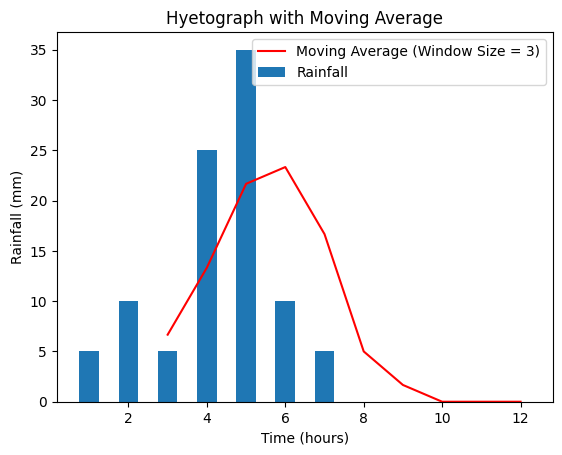

In [3]:
rainfall = [5, 10, 5, 25, 35, 10, 5, 0, 0, 0, 0, 0]
hours = list(range(1, 13))

# Calculate moving average
window_size = 3
moving_avg = np.convolve(rainfall, np.ones(window_size)/window_size, mode='valid')

# Create hyetograph
plt.bar(hours, rainfall, width=0.5, label='Rainfall')
plt.plot(hours[window_size-1:], moving_avg, color='red', label=f'Moving Average (Window Size = {window_size})')

plt.xlabel('Time (hours)')
plt.ylabel('Rainfall (mm)')
plt.title('Hyetograph with Moving Average')
plt.legend()


# Graph Slide

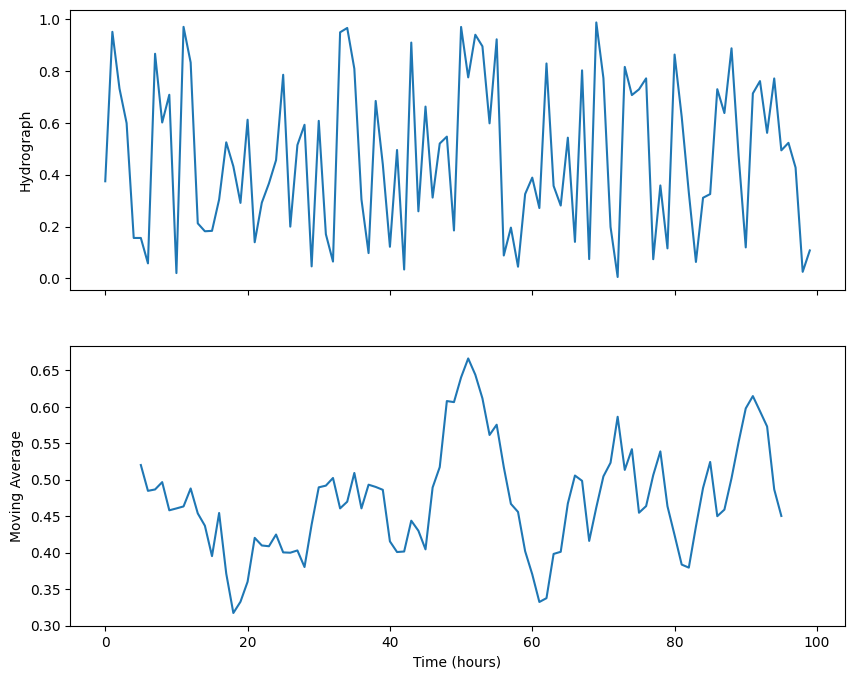

In [4]:
# Generate random data for the hydrograph
np.random.seed(42)
data = np.random.rand(100)

# Set the x-axis values for the hydrograph
x = np.arange(0, 100)

# Set the window size for the moving average
window_size = 10

# Calculate the moving average
weights = np.ones(window_size) / window_size
moving_average = np.convolve(data, weights, mode='valid')

# Set the x-axis values for the moving average plot
x_ma = np.arange(window_size/2, 100-(window_size/2)+1)

# Create a figure with two subplots, one for the hydrograph and one for the moving average
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot the hydrograph on the first subplot
ax1.plot(x, data)
ax1.set_ylabel('Hydrograph')

# Plot the moving average on the second subplot
ax2.plot(x_ma, moving_average)
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Moving Average')

# Show the plot
plt.show()

NameError: name 'find_peaks' is not defined

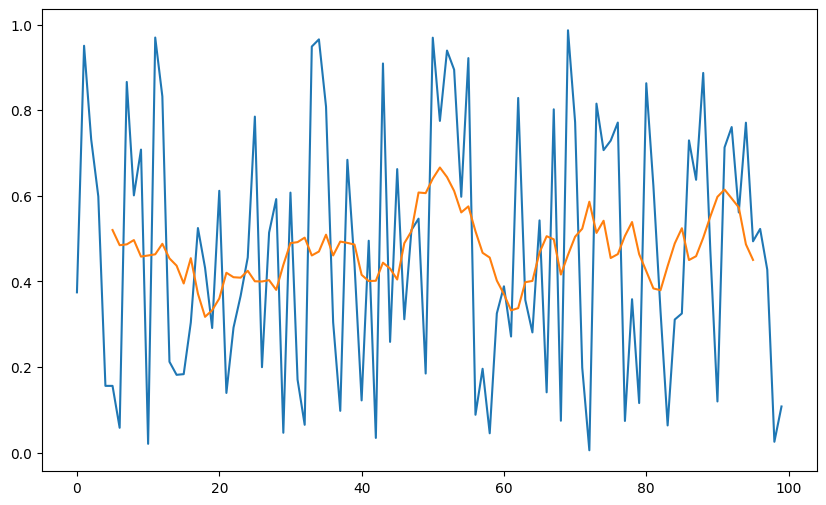

In [5]:
np.random.seed(42)
data = np.random.rand(100)

# Set the x-axis values for the hydrograph
x = np.arange(0, 100)

# Set the window size for the moving average
window_size = 10

# Calculate the moving average
weights = np.ones(window_size) / window_size
moving_average = np.convolve(data, weights, mode='valid')

# Set the x-axis values for the moving average plot
x_ma = np.arange(window_size/2, 100-(window_size/2)+1)

# Create a figure and plot both the hydrograph and the moving average on it
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the hydrograph
ax.plot(x, data, label='Hydrograph')

# Plot the moving average
ax.plot(x_ma, moving_average, label='Moving Average')

# plot points
peaks2, _ = find_peaks(x, prominence=1)      # BEST!
plt.plot(peaks2, x[peaks2], "ob"); 
#plt.plot(x); 
plt.legend(['prominence'])

# Set the plot title, x- and y-labels, and legend
ax.set_title('Hydrograph and Moving Average')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Flow Rate (m$^3$/s)')
ax.legend()

# Show the plot
plt.show()

# Find local max - prominece its the best way


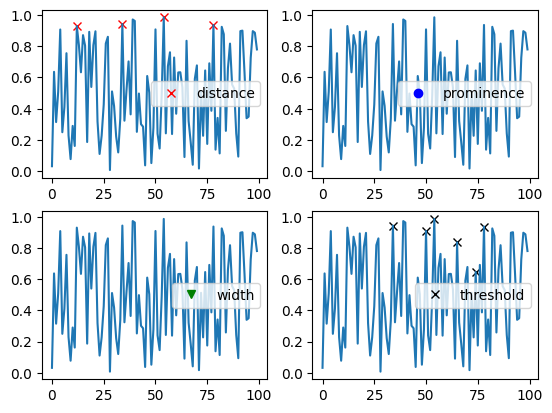

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

x = np.random.rand(100)
peaks, _ = find_peaks(x, distance=20)
peaks2, _ = find_peaks(x, prominence=1)      # BEST!
peaks3, _ = find_peaks(x, width=20)
peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])
plt.show()

In [7]:
-------------------------------------------------------------------

SyntaxError: invalid syntax (435325157.py, line 1)

# using ML model for time series - need good data

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = pd.read_csv('time_series_data.csv')

train_data, test_data = train_test_split(data, test_size=0.2)

# extract features from time series data
train_X = train_data.drop('maximum', axis=1)
train_y = train_data['maximum']
test_X = test_data.drop('maximum', axis=1)
test_y = test_data['maximum']

# train machine learning model on training data
model = RandomForestRegressor()
model.fit(train_X, train_y)

# use model to predict maximum in testing data
pred_y = model.predict(test_X)
max_index = pred_y.argmax()
predicted_max = pred_y[max_index]
actual_max = test_y.iloc[max_index]

# evaluate performance of model
mse = mean_squared_error(test_y, pred_y)
print('Mean squared error:', mse)
print('Predicted maximum:', predicted_max)
print('Actual maximum:', actual_max)

FileNotFoundError: [Errno 2] No such file or directory: 'time_series_data.csv'

In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('HSI_Q_V1.csv')


In [10]:
df.tail(100)

,shd_id,name,date,type_rc,type_r,h,qms,type_q,type_d,n,area_n_en,basin_c,basin_n,X,Y,geometry
1304595,38175,חרוד - בית שאן,2021-09-21T16:00:00Z,1,נקודה פנימית,9.74,0.003,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304596,38175,חרוד - בית שאן,2021-09-21T18:05:00Z,1,נקודה פנימית,9.78,0.004,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304597,38175,חרוד - בית שאן,2021-09-21T20:15:00Z,1,נקודה פנימית,9.78,0.004,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304598,38175,חרוד - בית שאן,2021-09-21T22:20:00Z,1,נקודה פנימית,9.77,0.003,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304599,38175,חרוד - בית שאן,2021-09-21T23:25:00Z,1,נקודה פנימית,9.77,0.003,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304600,38175,חרוד - בית שאן,2021-09-22T03:00:00Z,1,נקודה פנימית,9.78,0.004,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304601,38175,חרוד - בית שאן,2021-09-22T03:10:00Z,1,נקודה פנימית,9.79,0.004,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304602,38175,חרוד - בית שאן,2021-09-22T06:30:00Z,1,נקודה פנימית,9.80,0.004,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304603,38175,חרוד - בית שאן,2021-09-22T08:25:00Z,1,נקודה פנימית,9.80,0.004,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"
1304604,38175,חרוד - בית שאן,2021-09-22T10:20:00Z,1,נקודה פנימית,9.83,0.005,תקין,מדודים,30385,Eastern Valleys,36.0,Harod,248966,712519,"c(248966, 712519)"


In [11]:
df.shape

(1304695, 16)

In [12]:
df.describe()

,shd_id,type_rc,h,qms,n,basin_c,X,Y
count,1.304695e+06,1.304695e+06,1.299323e+06,1.304693e+06,1.304695e+06,1.247934e+06,1.304695e+06,1.304695e+06
mean,2.173444e+04,1.064643e+00,2.320505e+01,2.718612e+00,2.352857e+04,1.413431e+02,2.128647e+05,6.912229e+05
std,1.019190e+04,5.647708e-01,3.663593e+01,1.003823e+01,1.503355e+04,7.069809e+01,3.251148e+04,7.039433e+04
min,1.102000e+03,1.000000e+00,1.800000e+00,0.000000e+00,4.000000e+00,4.000000e+00,1.472910e+05,3.820910e+05
25%,1.713500e+04,1.000000e+00,1.000000e+01,1.020000e-01,1.090700e+04,4.300000e+01,1.857090e+05,6.378450e+05
50%,1.814000e+04,1.000000e+00,1.029000e+01,5.080000e-01,2.047100e+04,1.750000e+02,2.003980e+05,6.688570e+05
75%,3.013100e+04,1.000000e+00,1.104000e+01,1.796000e+00,3.132700e+04,1.920000e+02,2.526600e+05,7.556430e+05
max,6.019000e+04,7.000000e+00,2.269800e+02,1.043150e+03,6.144700e+04,2.030000e+02,2.714310e+05,7.986820e+05


In [13]:
df['shd_id'].nunique()


163

In [14]:
df['date'] = pd.to_datetime(df['date'])
earliest_date = df['date'].min()
latest_date = df['date'].max()
print(earliest_date)
print(latest_date)

2010-10-01 00:00:00+00:00
2022-10-01 00:00:00+00:00


/home/amit/anaconda3/envs/gpu/lib/python3.11/site-packages/contextily/tile.py:592: RuntimeWarning: invalid value encountered in subtract
  lon_length = np.subtract(*lon_range)
/home/amit/anaconda3/envs/gpu/lib/python3.11/site-packages/contextily/tile.py:597: RuntimeWarning: divide by zero encountered in scalar divide
  zoom_lat = np.ceil(np.log2(360 * 2.0 / lat_length))


ValueError: cannot convert float NaN to integer

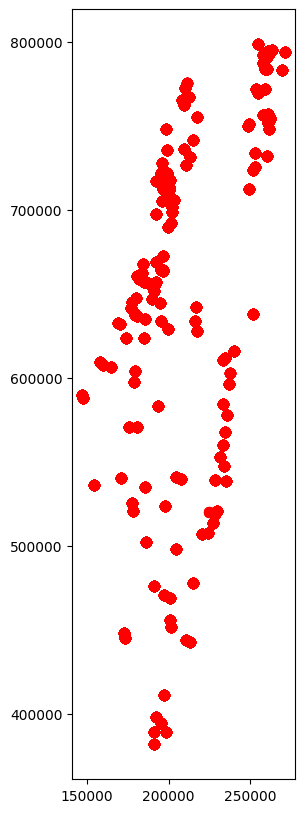

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame from the X and Y coordinates
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['X'], df['Y']))

# Set the coordinate system (Assuming CRS 4326 - WGS 84 or CRS 6991 for Israel)
gdf.set_crs(epsg=4326, inplace=True)  # or 6991 if that's the case for your data

# Plotting the points
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=50)

# Adding basemap for Israel using contextily
import contextily as ctx
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Points on Israel Map')
plt.show()
